In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D ,Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from google.colab import drive
from tensorflow.keras.models import load_model

In [12]:
import numpy as np
import os
import cv2
from tqdm import tqdm


def load_images_from_folder(folder_path, max_images, label, target_size=(64, 64)):
    images = []
    labels = []
    count = 0
    for filename in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, filename)
        img = cv2.imread(file_path)
        if img is not None:
            # Resize ảnh về kích thước 64x64
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized)
            labels.append(label)
            count += 1
            if count >= max_images:
                break
    return np.array(images), np.array(labels)


anime_path = "/content/drive/MyDrive/anime_human/anime"
human_path = "/content/drive/MyDrive/anime_human/Human"

# Load dữ liệu với số lượng yêu cầu và resize về 64x64
x_anime, y_anime = load_images_from_folder(anime_path, max_images=1000, label=1)  # Anime = 1
x_human, y_human = load_images_from_folder(human_path, max_images=500, label=0)   # Human = 0


x_train_anime, x_test_anime = x_anime[:800], x_anime[800:1000]
y_train_anime, y_test_anime = y_anime[:800], y_anime[800:1000]


x_train_human, x_test_human = x_human[:400], x_human[400:500]
y_train_human, y_test_human = y_human[:400], y_human[400:500]


x_train = np.concatenate((x_train_anime, x_train_human), axis=0)
y_train = np.concatenate((y_train_anime, y_train_human), axis=0)

x_test = np.concatenate((x_test_anime, x_test_human), axis=0)
y_test = np.concatenate((y_test_anime, y_test_human), axis=0)


print("Train Data:", x_train.shape, "Train Labels:", y_train.shape)
print("Test Data:", x_test.shape, "Test Labels:", y_test.shape)




100%|█████████▉| 499/500 [00:02<00:00, 200.23it/s]

Train Data: (1200, 64, 64, 3) Train Labels: (1200,)
Test Data: (300, 64, 64, 3) Test Labels: (300,)


In [13]:
print(x_train[0])

[[[162 143 210]
  [170 145 235]
  [155 127 238]
  ...
  [108  75 171]
  [ 95  62 157]
  [ 74  39 134]]

 [[189 168 244]
  [152 129 225]
  [159 135 245]
  ...
  [ 66  29 132]
  [ 50  13 110]
  [ 49  13 104]]

 [[171 153 226]
  [177 158 245]
  [154 137 227]
  ...
  [ 50  12 113]
  [ 50  13 108]
  [ 61  25 115]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [170 157 154]
  [174 161 157]
  [181 168 164]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [141 129 125]
  [156 144 140]
  [158 146 142]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 61  51  49]
  [ 58  48  45]
  [ 57  48  45]]]


In [17]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train[0])

[[[0.63529414 0.56078434 0.8235294 ]
  [0.6666667  0.5686275  0.92156863]
  [0.60784316 0.49803922 0.93333334]
  ...
  [0.42352942 0.29411766 0.67058825]
  [0.37254903 0.24313726 0.6156863 ]
  [0.2901961  0.15294118 0.5254902 ]]

 [[0.7411765  0.65882355 0.95686275]
  [0.59607846 0.5058824  0.88235295]
  [0.62352943 0.5294118  0.9607843 ]
  ...
  [0.25882354 0.11372549 0.5176471 ]
  [0.19607843 0.05098039 0.43137255]
  [0.19215687 0.05098039 0.40784314]]

 [[0.67058825 0.6        0.8862745 ]
  [0.69411767 0.61960787 0.9607843 ]
  [0.6039216  0.5372549  0.8901961 ]
  ...
  [0.19607843 0.04705882 0.44313726]
  [0.19607843 0.05098039 0.42352942]
  [0.23921569 0.09803922 0.4509804 ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.6666667  0.6156863  0.6039216 ]
  [0.68235296 0.6313726  0.6156863 ]
  [0.70980394 0.65882355 0.6431373 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1200, 64, 64, 3)
(1200,)
(300, 64, 64, 3)
(300,)


0


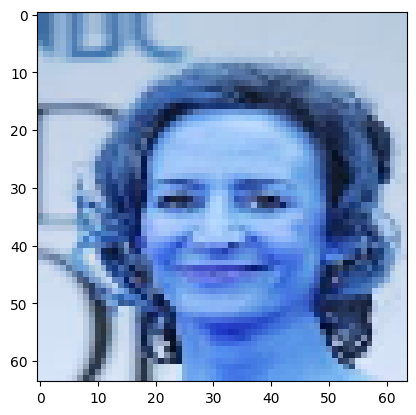

In [24]:
idx = np.random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
print(y_train[idx])


In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPool2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=10, batch_size = 64 , validation_split=0.2)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.6825 - loss: 0.4852 - val_accuracy: 0.0000e+00 - val_loss: 1.3399
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8316 - loss: 0.2729 - val_accuracy: 0.6250 - val_loss: 0.6591
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9880 - loss: 0.0841 - val_accuracy: 0.9833 - val_loss: 0.0950
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9889 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 0.9958 - val_loss: 0.0263
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9992 - loss: 0.0059 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9958 - val_loss: 0.0157
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.995

In [31]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
model.save('/content/drive/MyDrive/ani_hu.h5')

In [33]:
model = load_model('/content/drive/MyDrive/anime_human/ani_hu.h5')

--------------PREDICT--------------


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.00168917]]
Human


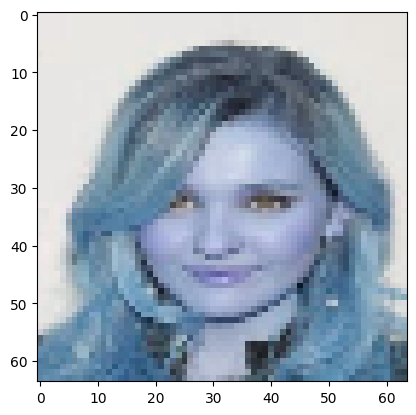

In [40]:
idx2 = random.randint(0, len(x_test))
plt.imshow(x_test[idx2,:])

y_pred = model.predict(x_test[idx2,:].reshape(1, 64, 64, 3))
print(y_pred)
if(y_pred > 0.5):
  print("Anime")
else:
  print("Human")


In [41]:
!pip install opencv-python pillow


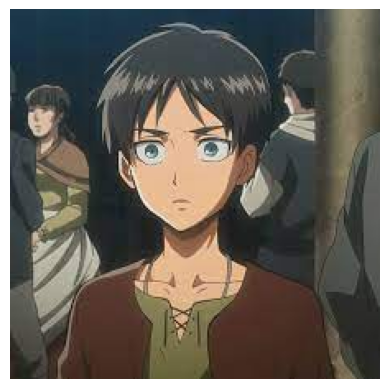

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Raw prediction output: [[0.8735289]]
👉 Dự đoán: Anime


In [52]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# 🔹 URL ảnh (phải là ảnh gốc, không phải thumbnail TBN)
image_url ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBDeqHMmyRrvywGRe_x6d-A-MUFHD-Z5k4J2RUKSSJapkrCgpX91p0omf7iKeLUruyarU&usqp=CAU"
try:
    # 📥 Bước 1: Tải ảnh từ URL
    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Kiểm tra lỗi HTTP (403, 404,...)

    # Chuyển đổi ảnh sang định dạng PIL
    image = Image.open(BytesIO(response.content))

    # Hiển thị ảnh gốc
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    # 🎯 Bước 2: Chuyển đổi ảnh thành định dạng model yêu cầu
    target_size = (64, 64)  # Kích thước model cần

    # Chuyển ảnh từ PIL → NumPy
    image = np.array(image)

    # Chuyển ảnh về RGB nếu cần
    if image.shape[-1] == 4:
        image = image[:, :, :3]  # Bỏ kênh alpha

    # Resize ảnh
    image_resized = cv2.resize(image, target_size)

    # Chuẩn hóa ảnh về [0,1]
    image_resized = image_resized.astype("float32") / 255.0

    # Reshape ảnh để phù hợp với model (1, 64, 64, 3)
    image_input = np.expand_dims(image_resized, axis=0)

    # 🔮 Bước 3: Dự đoán với model
    y_pred = model.predict(image_input)

    # 📌 Bước 4: In kết quả dự đoán
    print("Raw prediction output:", y_pred)
    print("👉 Dự đoán:", "Anime" if y_pred > 0.5 else "Human")

except requests.exceptions.RequestException as e:
    print(f"⚠️ Lỗi khi tải ảnh: {e}")
